<Axes: xlabel='Date'>

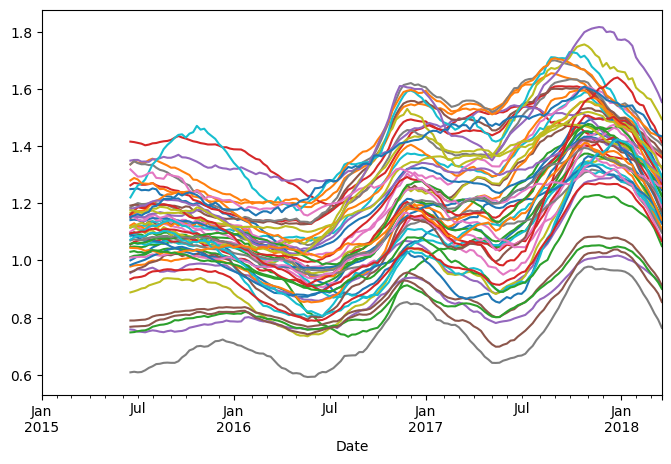

In [1]:
import pandas as pd
df = pd.read_csv("avocado.csv")
df = df.copy()[df['type']=='conventional']

df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)
# df.head()

# albany_df = df.copy()[df["region"]=="Albany"]
# albany_df.set_index("Date", inplace=True)
# albany_df.sort_index(inplace=True)

# albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()
#albany_df["price25ma"].plot()
#albany_df.tail(20)

# get all regions
#print(set(df["region"].values.tolist()))
#df["region"].unique()

graph_df = pd.DataFrame()
for region in df["region"].unique():
    region_df = df.copy()[df["region"]==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]    # note double square brackets
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

#graph_df.tail()
graph_df.plot(figsize=(8, 5), legend=False)